[ベイズ最適化入門](https://qiita.com/masasora/items/cc2f10cb79f8c0a6bbaa)  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2.
A few modifications to fit it to python3 are needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys

%matplotlib inline

In [2]:
#### kernel
def my_kernel(x_n,x_m,a_1=200.0,a_2=0.1,a_3=1.0,a_4=10.0):
    return a_1*np.exp(-a_2*0.5*np.dot(x_n-x_m,x_n-x_m))

### Gaussian process
def pred(_x,_y,newpoint):
    ### gram matrix
    aaa=np.array([my_kernel(i,j) for i in _x for j in _x])
    K = aaa.reshape([np.shape(_x)[0],np.shape(_x)[0]])
    aux = np.array([my_kernel(i,newpoint) for i in _x])
    mu = np.dot(aux,np.dot(np.linalg.inv(K),_y))
    vari = my_kernel(newpoint,newpoint)-np.dot(aux,np.dot(np.linalg.inv(K+np.identity(len(_x))),aux))
    return (mu,vari)

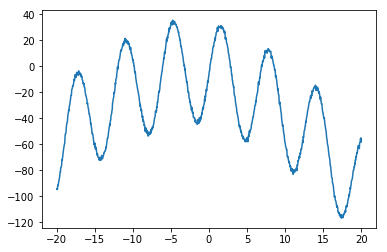

In [3]:
def generate_sample(x):
    return 40.0*np.sin(x/1.0)-np.power(0.3*(x+6.0),2)-np.power(0.2*(x-4.0),2)-1.0*np.abs(x+2.0)+np.random.normal(0,1,1)

x_ziku = np.linspace(-20,20,1000)
#z_ziku = map(generate_sample,x_ziku)
z_ziku = list(map(generate_sample,x_ziku)) #for python3 
plt.plot(x_ziku, z_ziku) #### plot true data
plt.show()
#sys.exit()

def maximum(x):
#    return max(xrange(np.shape(x)[0]), key=lambda i:x[i])
    return max(range(np.shape(x)[0]), key=lambda i:x[i])

#### EI
def aqui1(mean,vari,qqq):
    lamb = (mean - qqq)/(vari*1.0)
    z = np.array([(mean[i] - qqq)*norm.cdf(lamb[i]) + vari[i]*norm.pdf(lamb[i]) for i in range(len(lamb))])
    return z

#### PI
def aqui2(mean,vari,qqq):
    lamb = (mean - qqq-0.01)/(vari*1.0)
    z = np.array([norm.cdf(lamb[i]) for  i in range(len(lamb))])
    return z
#### UCB
def aqui3(mean,vari,qqq):
    return mean+1.0*vari

x_point6.005546950755473
x_point[-20.00381239]
x_point[19.99507896]
x_point[-6.57370723]
x_point[12.83038291]
x_point[-0.33751228]
x_point[-12.82114315]
x_point[16.30343516]
x_point[9.35205179]
x_point[-3.45102741]
x_point[-16.12788519]
x_point[2.85696291]
x_point[-4.18550242]
x_point[-4.90137566]
x_point[1.42925473]


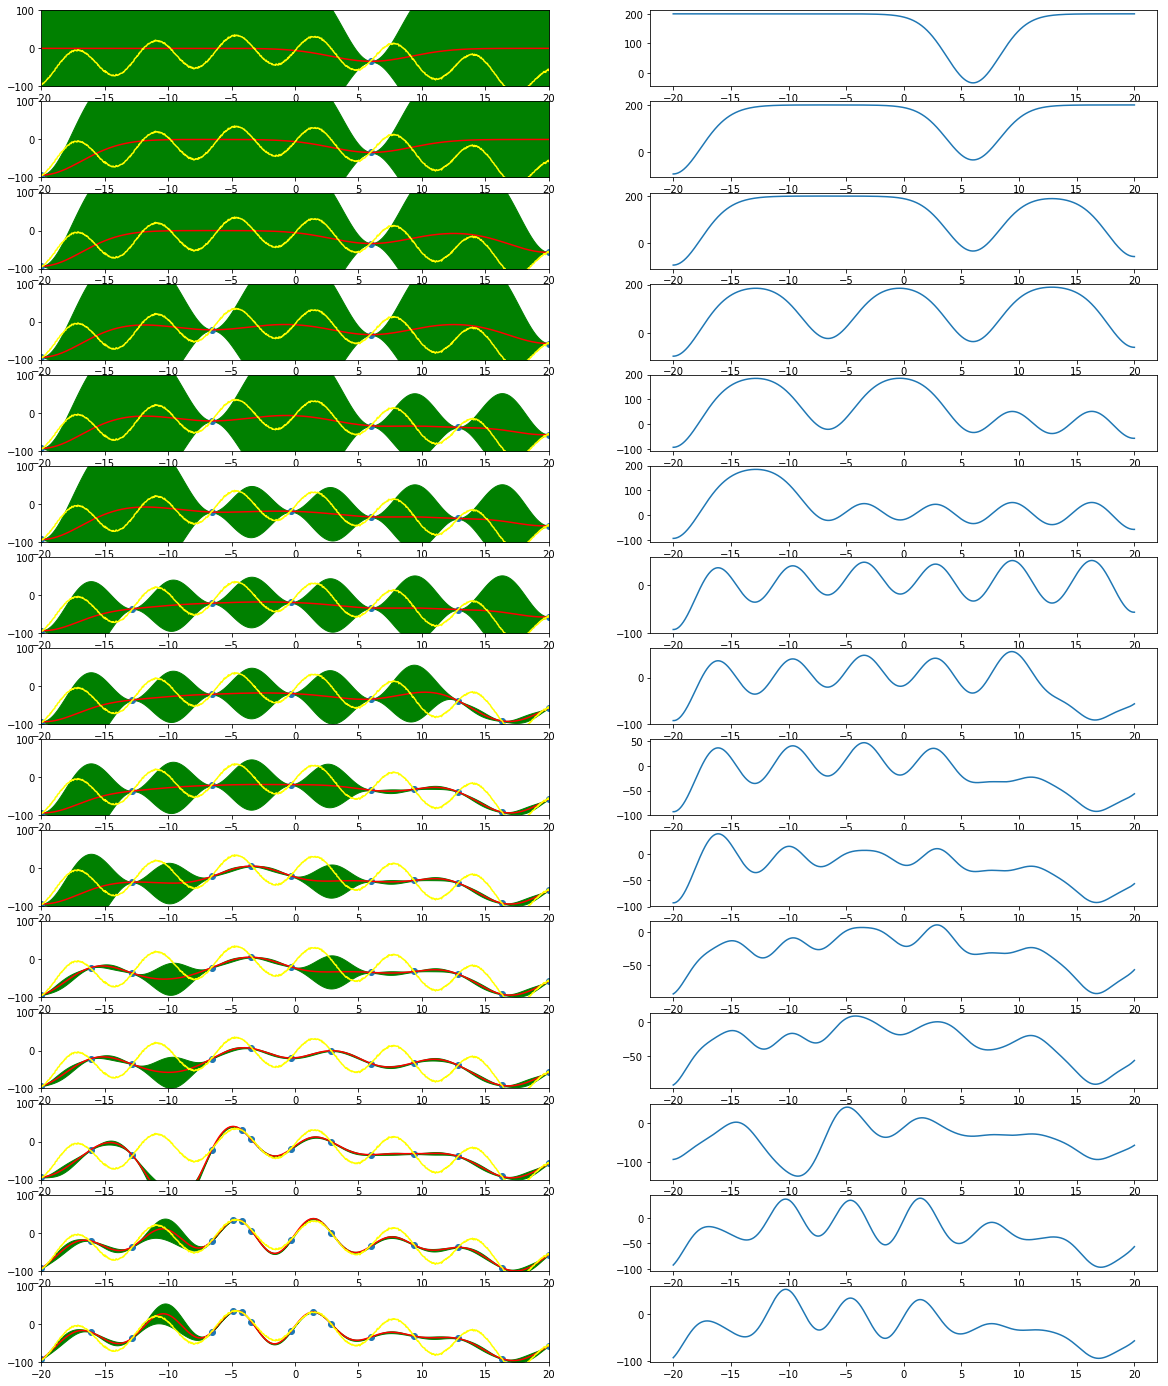

finish


In [4]:
x_array = np.array([])
y_array = np.array([])
x_point = np.random.uniform(-20,20)
epoch=15
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_array:
        x_array = np.append(x_array,x_point)
#        print "x_point"+str(x_point)
        print ("x_point"+str(x_point))
        y_point = generate_sample(x_point)
        y_array = np.append(y_array,y_point)
        #y_array = np.unique(y_array)
    mean_point = np.array([ pred(x_array,y_array,j)[0] for j in x_ziku])
    variance_point = np.array([ pred(x_array,y_array,j)[1] for j in x_ziku]) 
    qqq = max(y_array)
    accui = aqui3(mean_point,variance_point,qqq) ###change this function
    x_point = x_ziku[maximum(accui)]+np.random.normal(0,0.01,1)
    if(i%1==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x_ziku,np.array(mean_point),color="red",label="mean")
        plt.plot(x_ziku,z_ziku,color="yellow")
        high_bound = mean_point+ 1.0*variance_point
        lower_bound = mean_point- 1.0*variance_point
        plt.fill_between(x_ziku,high_bound,lower_bound,color="green",label="confidence")
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_array,y_array)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x_ziku,accui)
        plt.savefig("bayes_UCB.png")### change the name
plt.show()
#print "finish"
print ("finish")